In [5]:
from src.preprocessing.reader import Reader

r = Reader('../data/digital_leaders/test_dataset_test/', mode='test', read_type="opencv")
print(r)

Image path: ../data/digital_leaders/test_dataset_test/images
Mask path: ../data/digital_leaders/test_dataset_test/masks


In [7]:
from tqdm.notebook import tqdm

image_stats = {
    "width": [],
    "height": [],
    "ratio": [],
    "area": [],
    "width x height": [],
}

for i in tqdm(range(8)):
    img, mask = r.read_sample(i)
    image_stats["width"].append(img.shape[0])
    image_stats["height"].append(img.shape[1])
    image_stats["ratio"].append(img.shape[0] / img.shape[1])
    image_stats["area"].append(img.shape[0] * img.shape[1])
    image_stats["width x height"].append("{} x {}".format(img.shape[0], img.shape[1]))

  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
# sizes sorted by area size
sorted(image_stats["width x height"],
       key=lambda x: - int(x.split(" x ")[0]) * int(x.split(" x ")[1]))

['7705 x 10214',
 '7526 x 8422',
 '4966 x 7851',
 '5885 x 6584',
 '4868 x 5784',
 '4643 x 4279',
 '3763 x 4838',
 '2554 x 3784']

In [9]:
test_idx = 0
test_image, test_mask = r.read_sample(test_idx)
test_mask.shape, test_mask.dtype, test_mask.min(), test_mask.max()

((7705, 10214), dtype('uint8'), 0, 1)

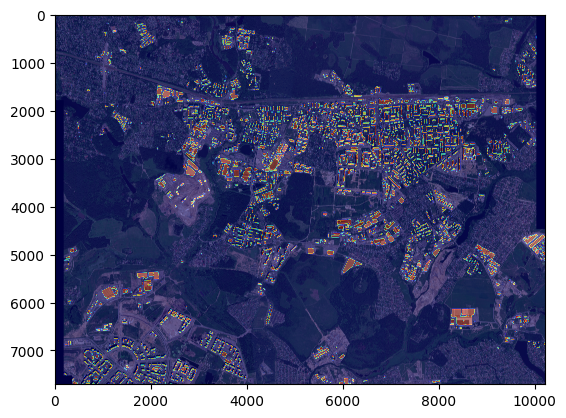

In [10]:
import matplotlib.pyplot as plt

plt.imshow(test_image)
plt.imshow(test_mask, alpha=0.5, cmap="jet")
plt.show()

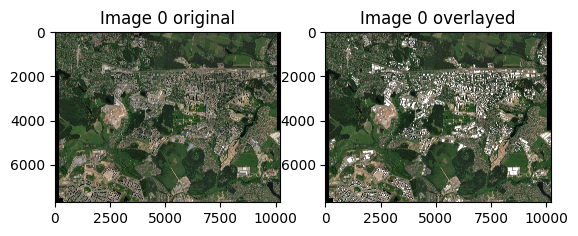

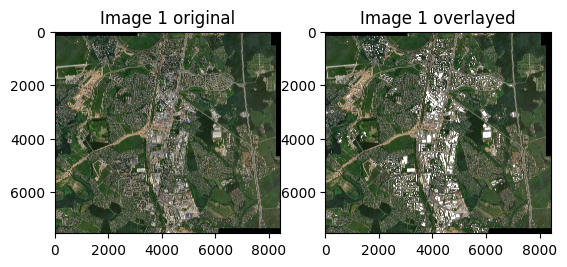

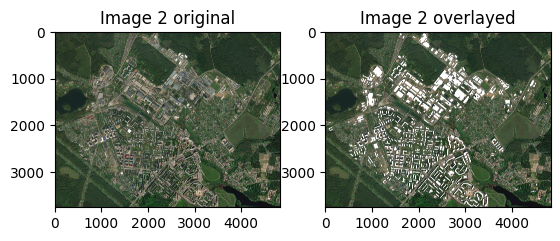

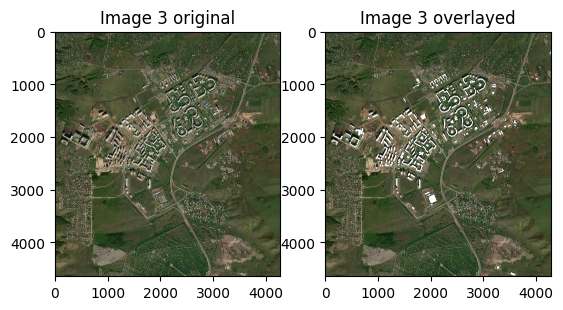

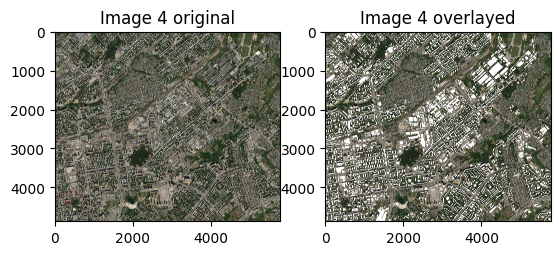

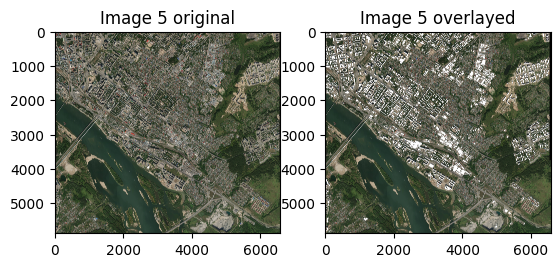

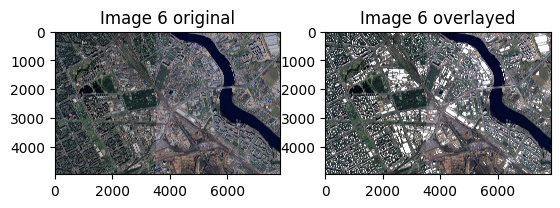

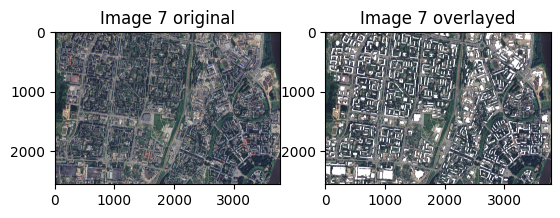

In [11]:
import cv2


def create_overlay(image, mask):
    new_image = image.copy()
    new_image[mask != 0] = 255
    return new_image


for test_idx in range(8):
    test_image, test_mask = r.read_sample(test_idx)

    overlayed = create_overlay(test_image, test_mask)

    # and save it
    cv2.imwrite(f"../artifacts/images/overlay_{test_idx}.png", overlayed)
    # also copy original
    cv2.imwrite(f"../artifacts/images/original_{test_idx}.png", test_image)

    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.imshow(test_image)
    plt.title(f"Image {test_idx} original")
    plt.subplot(1, 2, 2)
    plt.imshow(overlayed)
    plt.title(f"Image {test_idx} overlayed")
    plt.show()
